<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_Locations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I set some limitations to label stars by their locations.

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1489, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 1489 (delta 207), reused 267 (delta 157), pack-reused 1088
Receiving objects: 100% (1489/1489), 115.78 MiB | 14.65 MiB/s, done.
Resolving deltas: 100% (730/730), done.
Updating files: 100% (161/161), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
def Ellipse(x,a,b):
  '''
   a: semi-major axis
   b: semi-minor axis
  '''
  y = b * ((1 - ((x/a)**2) )**0.5)
  return y

In [4]:
Z = 0.01
Z_name = ''.join(list(str(Z))[2:])

# Data Preparing

In [47]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

Ra_center = 296.23 #degree
Dec_center = -14.80167 #degree

Distance = 500 #Kpc
R_bulge = 0.560 #Kpc
R_body = 1.4 #Kpc

In [48]:
df = pd.read_csv("/content/NGC_6822/Data_V3/Final_cleaned_data_v3.csv")

In [49]:
df['DCG'] = ((df['Ra(J2000) deg']-(Ra_center))**2 + (df['Dec(J2000) deg']-(Dec_center))**2)**0.5

In [50]:
df

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,DCG
0,296.183980,-14.780180,18.230,17.510,17.120,O,Whitelock,NaN,0.050790
1,296.252290,-14.784750,17.490,16.540,16.080,O,Whitelock,NaN,0.027984
2,296.204150,-14.634860,16.580,15.910,15.460,O,Whitelock,NaN,0.168801
3,296.223640,-14.774730,16.440,15.580,15.130,O,Whitelock,NaN,0.027681
4,296.218160,-14.880350,16.300,15.530,15.090,O,Whitelock,NaN,0.079566
...,...,...,...,...,...,...,...,...,...
325,296.044067,-14.905341,18.504,17.750,17.381,C5.5,Kacharov,20.697,0.212882
326,296.003693,-14.974893,18.392,17.560,17.210,C5.5,Kacharov,20.379,0.284993
327,295.993561,-14.990264,17.874,16.702,15.840,C6.5,Kacharov,19.735,0.302442
328,296.020050,-15.036669,17.751,17.008,16.689,C8.2,Kacharov,19.639,0.315125


# Wyder

In [51]:
df_wyder_region = pd.read_csv("/content/NGC_6822/Data/Wyder_regions.csv")

In [52]:
Wyder_centers = df_wyder_region.groupby('Region')['Dec','RA'].aggregate('mean')

<ipython-input-52-86897443ceb5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Wyder_centers = df_wyder_region.groupby('Region')['Dec','RA'].aggregate('mean')


In [53]:
df['Wyder']=0
for j in range(len(Wyder_centers)):
  df['Wyder_'+ Wyder_centers.index[j]] = 0
  for i in range(len(df)):
    distance = (((df.loc[i,'Dec(J2000) deg']-Wyder_centers.loc[Wyder_centers.index[j],'Dec'])**2) +
                ((df.loc[i,'Ra(J2000) deg']-Wyder_centers.loc[Wyder_centers.index[j],'RA'])**2))**0.5
    if distance <= 0.023 :
      df.loc[i,'Wyder_'+ Wyder_centers.index[j]] = int(1)
      df.loc[i,'Wyder'] = int(1)

In [54]:
df

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,DCG,Wyder,Wyder_C1,Wyder_C12,Wyder_C18,Wyder_C25,Wyder_H IV,Wyder_HV I,Wyder_HV II,Wyder_HV III
0,296.183980,-14.780180,18.230,17.510,17.120,O,Whitelock,NaN,0.050790,0,0,0,0,0,0,0,0,0
1,296.252290,-14.784750,17.490,16.540,16.080,O,Whitelock,NaN,0.027984,1,0,0,1,0,0,0,0,0
2,296.204150,-14.634860,16.580,15.910,15.460,O,Whitelock,NaN,0.168801,0,0,0,0,0,0,0,0,0
3,296.223640,-14.774730,16.440,15.580,15.130,O,Whitelock,NaN,0.027681,1,0,1,0,0,0,0,0,0
4,296.218160,-14.880350,16.300,15.530,15.090,O,Whitelock,NaN,0.079566,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,296.044067,-14.905341,18.504,17.750,17.381,C5.5,Kacharov,20.697,0.212882,0,0,0,0,0,0,0,0,0
326,296.003693,-14.974893,18.392,17.560,17.210,C5.5,Kacharov,20.379,0.284993,0,0,0,0,0,0,0,0,0
327,295.993561,-14.990264,17.874,16.702,15.840,C6.5,Kacharov,19.735,0.302442,0,0,0,0,0,0,0,0,0
328,296.020050,-15.036669,17.751,17.008,16.689,C8.2,Kacharov,19.639,0.315125,0,0,0,0,0,0,0,0,0


# Bulge ( a = 3.85 arcmin = 0.06416667 degree, b = 5 arcmin = 0.0833333 degree )

In [55]:
df['Bulge'] = 0
a = 0.06416667
b = 0.0833333
for i in range(len(df)):
  x_star = df.loc[i,'Ra(J2000) deg'] - Ra_center
  y_star = df.loc[i,'Dec(J2000) deg'] - Dec_center
  if x_star < a :
    y = Ellipse(x_star,a,b)
    if abs(y_star) < y :
      df.loc[i,'Bulge'] = int(1)

<ipython-input-3-3d3079c4fa86>:6: RuntimeWarning: invalid value encountered in double_scalars
  y = b * ((1 - ((x/a)**2) )**0.5)


In [56]:
df_bulge = df[df['Bulge'] == 1 ]

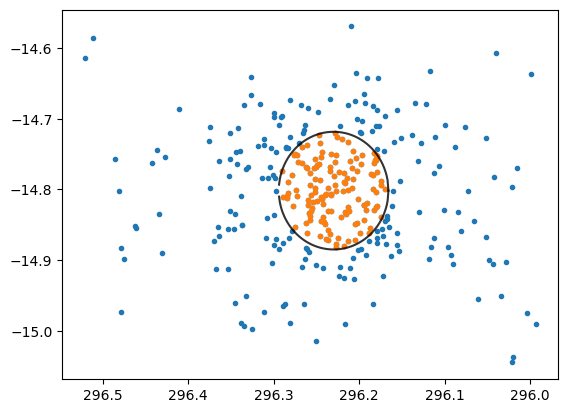

In [57]:
from numpy.ma.core import size
xx = np.arange(-a,a,0.001)
plt.plot(xx + Ra_center ,  (Ellipse(xx,a,b) + Dec_center ), c = 'k', alpha = 0.8)
plt.plot(xx + Ra_center , - (Ellipse(xx,a,b) - Dec_center ), c = 'k', alpha = 0.8)
plt.scatter(df['Ra(J2000) deg'],df['Dec(J2000) deg'],marker='.')
plt.scatter(df_bulge['Ra(J2000) deg'],df_bulge['Dec(J2000) deg'],marker='.')

#plt.scatter(Wyder_centers['RA'],Wyder_centers['Dec'])
plt.gca().invert_xaxis()

# Bulge _ Optical Body Radius  ( Ellipse < R < 1.4 Kpc )

In [58]:
body_degree = math.degrees( R_body / Distance )
print(body_degree)

0.1604281826366305


In [59]:
df['Body'] = 0
a = 0.06416667
b = 0.0833333
for i in range(len(df)):
  if df.loc[i,'Bulge'] < 1 and df.loc[i,'DCG'] < body_degree :
    df.loc[i,'Body'] = int(1)

In [60]:
df_body = df[df['Body'] == 1 ]

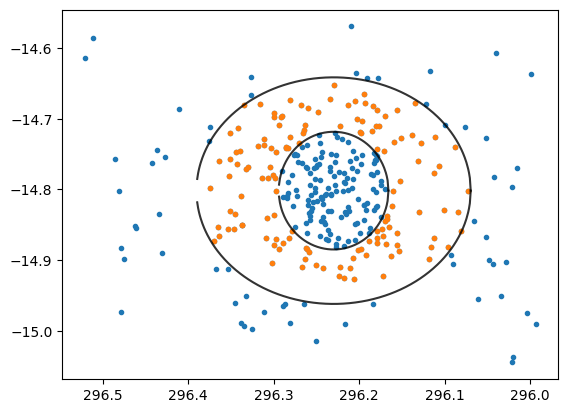

In [61]:
from numpy.ma.core import size
xx = np.arange(-a,a,0.001)
plt.plot(xx + Ra_center ,  (Ellipse(xx,a,b) + Dec_center ), c = 'k', alpha = 0.8)
plt.plot(xx + Ra_center , - (Ellipse(xx,a,b) - Dec_center ), c = 'k', alpha = 0.8)

xxx = np.arange(-body_degree,body_degree,0.001)
plt.plot(xxx + Ra_center ,   (body_degree**2 - xxx**2)**0.5 + Dec_center , c = 'k', alpha = 0.8)
plt.plot(xxx + Ra_center , - (body_degree**2 - xxx**2)**0.5 + Dec_center , c = 'k', alpha = 0.8)

plt.scatter(df['Ra(J2000) deg'],df['Dec(J2000) deg'],marker='.')
plt.scatter(df_body['Ra(J2000) deg'],df_body['Dec(J2000) deg'],marker='.')

#plt.scatter(Wyder_centers['RA'],Wyder_centers['Dec'])
plt.gca().invert_xaxis()

# Bulge (Center,North,South)

In [62]:
df['Bulge_Center'] = 0
df['Bulge_North'] = 0
df['Bulge_South'] = 0

a = 0.13333
b = 0.066
c = 0.0466

for i in range(len(df)):
  x_star = df.loc[i,'Ra(J2000) deg'] - Ra_center
  y_star = df.loc[i,'Dec(J2000) deg'] - Dec_center
  if x_star < a :
    y = Ellipse(x_star,b,a)
    if abs(y_star) < y :
      y_prime = Ellipse(x_star,b,c)
      if abs(y_star) < y_prime :
        df.loc[i,'Bulge_Center'] = int(1)
      else :
        if y_star >= 0 :
          df.loc[i,'Bulge_North'] = int(1)
        if y_star < 0 :
          df.loc[i,'Bulge_South'] = int(1)


<ipython-input-3-3d3079c4fa86>:6: RuntimeWarning: invalid value encountered in double_scalars
  y = b * ((1 - ((x/a)**2) )**0.5)


<ipython-input-3-3d3079c4fa86>:6: RuntimeWarning: invalid value encountered in sqrt
  y = b * ((1 - ((x/a)**2) )**0.5)


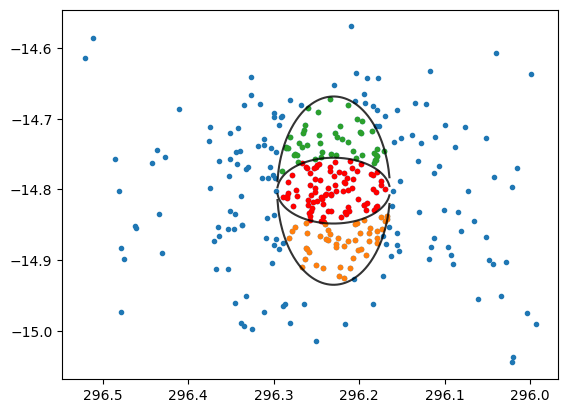

In [63]:
from numpy.ma.core import size


df_Bulge_Center = df[df['Bulge_Center'] == 1 ]
df_Bulge_South = df[df['Bulge_South'] == 1 ]
df_Bulge_North = df[df['Bulge_North'] == 1 ]

xx = np.arange(-a,a,0.001)
plt.plot(xx + Ra_center ,  (Ellipse(xx,b,a) + Dec_center ), c = 'k', alpha = 0.8)
plt.plot(xx + Ra_center , - (Ellipse(xx,b,a) - Dec_center ), c = 'k', alpha = 0.8)


plt.plot(xx + Ra_center ,  (Ellipse(xx,b,c) + Dec_center ), c = 'k', alpha = 0.8)
plt.plot(xx + Ra_center , - (Ellipse(xx,b,c) - Dec_center ), c = 'k', alpha = 0.8)

plt.scatter(df['Ra(J2000) deg'],df['Dec(J2000) deg'],marker='.')
plt.scatter(df_Bulge_Center['Ra(J2000) deg'],df_Bulge_Center['Dec(J2000) deg'],marker='.',c='r')
plt.scatter(df_Bulge_South['Ra(J2000) deg'],df_Bulge_South['Dec(J2000) deg'],marker='.')
plt.scatter(df_Bulge_North['Ra(J2000) deg'],df_Bulge_North['Dec(J2000) deg'],marker='.')

#plt.scatter(Wyder_centers['RA'],Wyder_centers['Dec'])
plt.gca().invert_xaxis()

# Whitelock

In [64]:
df['Whitelock'] = 0

for i in range(len(df)):
  x_star = df.loc[i,'Ra(J2000) deg']
  y_star = df.loc[i,'Dec(J2000) deg']
  if y_star < -14.627 and y_star > -14.977 :
    if x_star < 296.3104 and x_star > 296.156 :
      df.loc[i,'Whitelock'] = int(1)

In [65]:
df_Whitelock = df[df['Whitelock'] == 1 ]
df_Whitelock

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,DCG,Wyder,...,Wyder_H IV,Wyder_HV I,Wyder_HV II,Wyder_HV III,Bulge,Body,Bulge_Center,Bulge_North,Bulge_South,Whitelock
0,296.183980,-14.780180,18.230,17.510,17.120,O,Whitelock,NaN,0.050790,0,...,0,0,0,0,1,0,1,0,0,1
1,296.252290,-14.784750,17.490,16.540,16.080,O,Whitelock,NaN,0.027984,1,...,0,0,0,0,1,0,1,0,0,1
2,296.204150,-14.634860,16.580,15.910,15.460,O,Whitelock,NaN,0.168801,0,...,0,0,0,0,0,0,0,0,0,1
3,296.223640,-14.774730,16.440,15.580,15.130,O,Whitelock,NaN,0.027681,1,...,0,0,0,0,1,0,1,0,0,1
4,296.218160,-14.880350,16.300,15.530,15.090,O,Whitelock,NaN,0.079566,1,...,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,296.221710,-14.839417,17.929,17.000,16.501,C5.5,Kacharov,20.663,0.038647,1,...,0,1,0,0,1,0,1,0,0,1
318,296.204712,-14.849141,17.306,16.262,15.565,C6.5,Kacharov,20.326,0.053786,1,...,1,0,0,0,1,0,0,0,1,1
319,296.187256,-14.854028,18.166,17.224,16.937,C5.5,Kacharov,20.617,0.067590,0,...,0,0,0,0,1,0,0,0,1,1
320,296.227081,-14.876891,17.543,16.457,15.858,C5.5,Kacharov,20.122,0.075278,1,...,1,0,0,0,1,0,0,0,1,1


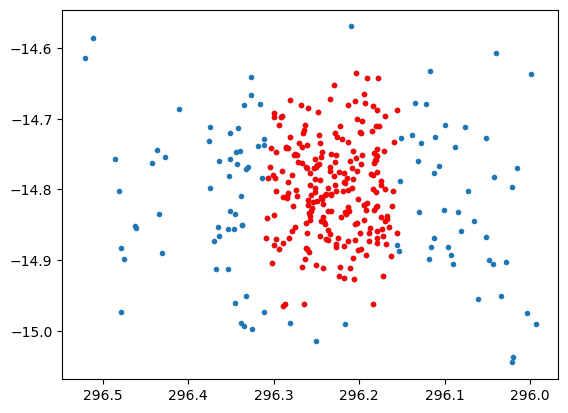

In [66]:
from numpy.ma.core import size


df_Whitelock = df[df['Whitelock'] == 1 ]



plt.scatter(df['Ra(J2000) deg'],df['Dec(J2000) deg'],marker='.')
plt.scatter(df_Whitelock['Ra(J2000) deg'],df_Whitelock['Dec(J2000) deg'],c='r',marker='.')

#plt.scatter(Wyder_centers['RA'],Wyder_centers['Dec'])
plt.gca().invert_xaxis()

# Saving Data

In [67]:
df_loc =df.loc[::,['Ra(J2000) deg','Dec(J2000) deg','Whitelock','Wyder','Bulge','Body','Bulge_Center','Bulge_North','Bulge_South']]

In [68]:
df_loc

,Ra(J2000) deg,Dec(J2000) deg,Whitelock,Wyder,Bulge,Body,Bulge_Center,Bulge_North,Bulge_South
0,296.183980,-14.780180,1,0,1,0,1,0,0
1,296.252290,-14.784750,1,1,1,0,1,0,0
2,296.204150,-14.634860,1,0,0,0,0,0,0
3,296.223640,-14.774730,1,1,1,0,1,0,0
4,296.218160,-14.880350,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
325,296.044067,-14.905341,0,0,0,0,0,0,0
326,296.003693,-14.974893,0,0,0,0,0,0,0
327,295.993561,-14.990264,0,0,0,0,0,0,0
328,296.020050,-15.036669,0,0,0,0,0,0,0


In [69]:
df_loc.to_csv('Data_location.csv')